# Reliance Stock Market Analysis & Prediction
This notebook downloads Reliance stock data from Yahoo Finance, performs data analysis and visualization, and builds a classic Machine Learning model (Linear Regression) to predict future stock prices.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# %matplotlib inline

In [25]:
# User input for stock ticker and date range
ticker = input("Enter stock ticker (default: RELIANCE.NS): ") or "RELIANCE.NS"
start_date = input("Enter start date (YYYY-MM-DD, default: 2020-01-01): ") or "2020-01-01"
end_date = input("Enter end date (YYYY-MM-DD, default: today): ") or None

# Download data
df = yf.download(ticker, start=start_date, end=end_date)
print(f"Data downloaded for {ticker}:")
df.head()

Enter stock ticker (default: RELIANCE.NS):  RELIANCE.NS
Enter start date (YYYY-MM-DD, default: 2020-01-01):  
Enter end date (YYYY-MM-DD, default: today):  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19032\1251465925.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data downloaded for RELIANCE.NS:


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2020-01-01,678.021362,685.881324,676.179942,681.794149,14004468
2020-01-02,689.564331,692.101988,679.099372,679.099372,17710316
2020-01-03,690.395142,692.416273,684.039786,688.531175,20984698
2020-01-06,674.383484,686.240737,672.811479,682.692574,24519177
2020-01-07,684.758545,689.205022,679.773056,682.243314,16683622


In [26]:
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1392 entries, 2020-01-01 to 2025-08-12
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   1392 non-null   float64
 1   (High, RELIANCE.NS)    1392 non-null   float64
 2   (Low, RELIANCE.NS)     1392 non-null   float64
 3   (Open, RELIANCE.NS)    1392 non-null   float64
 4   (Volume, RELIANCE.NS)  1392 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 65.2 KB
None

Basic Statistics:
Price         Close         High          Low         Open        Volume
Ticker  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS   RELIANCE.NS
count   1392.000000  1392.000000  1392.000000  1392.000000  1.392000e+03
mean    1130.710129  1142.664440  1119.617372  1131.408553  1.866507e+07
std      234.016867   234.171595   233.591519   233.800297  1.549078e+07
min      397.062042   426.682806   393.289256   411.50186

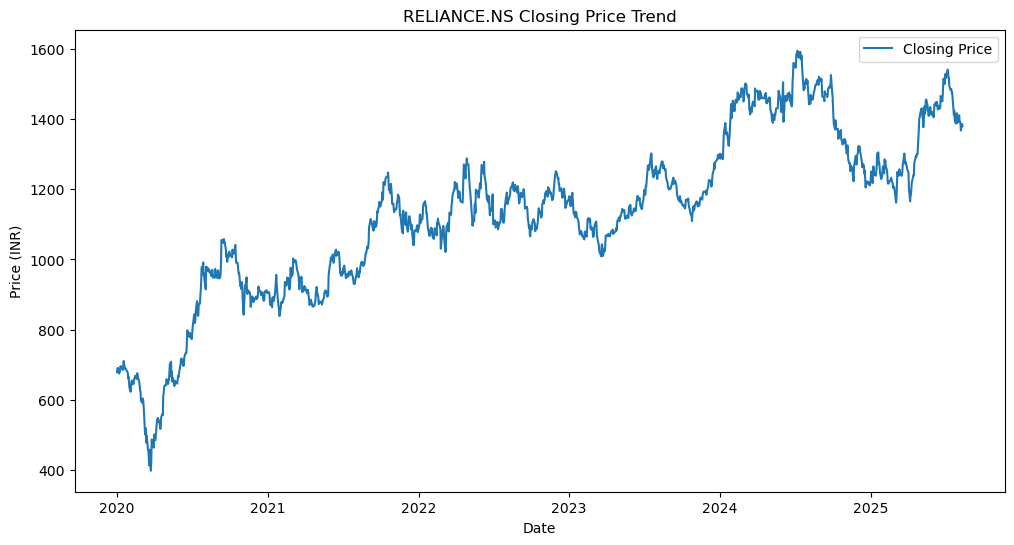

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{ticker} Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

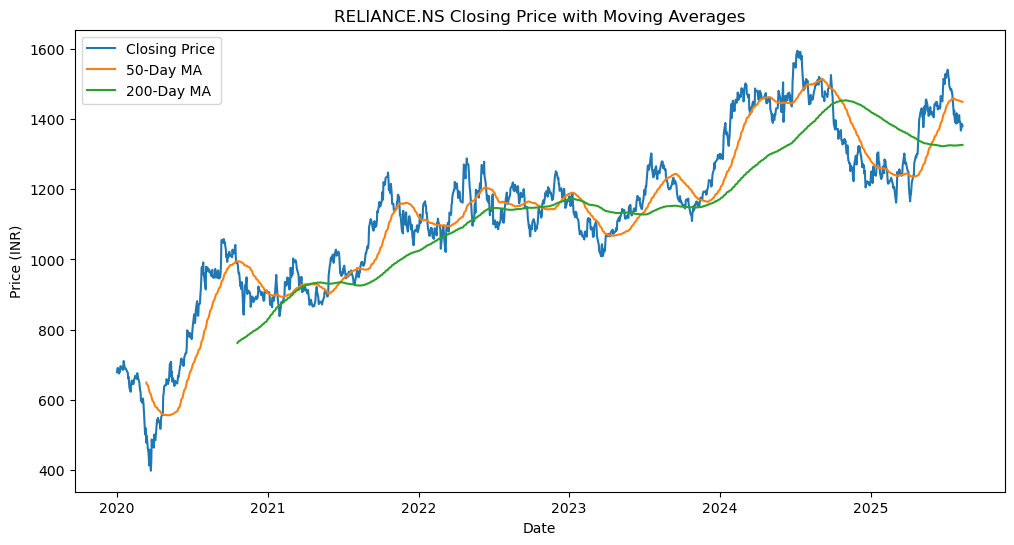

In [28]:
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title(f'{ticker} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

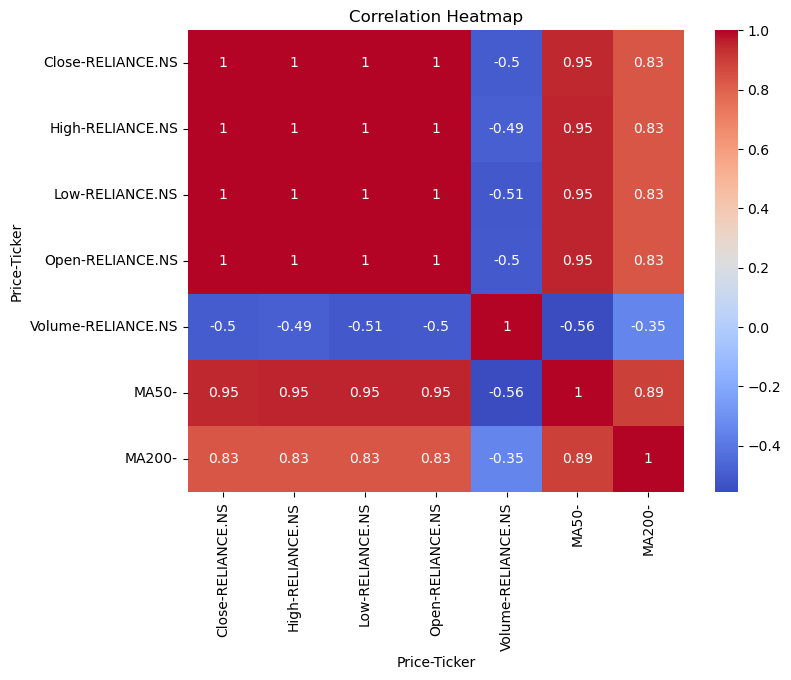

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
# Feature engineering: use Open, High, Low, Volume to predict Close
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Model trained successfully.")

Model trained successfully.


RMSE: 5.25
R² Score: 0.9992


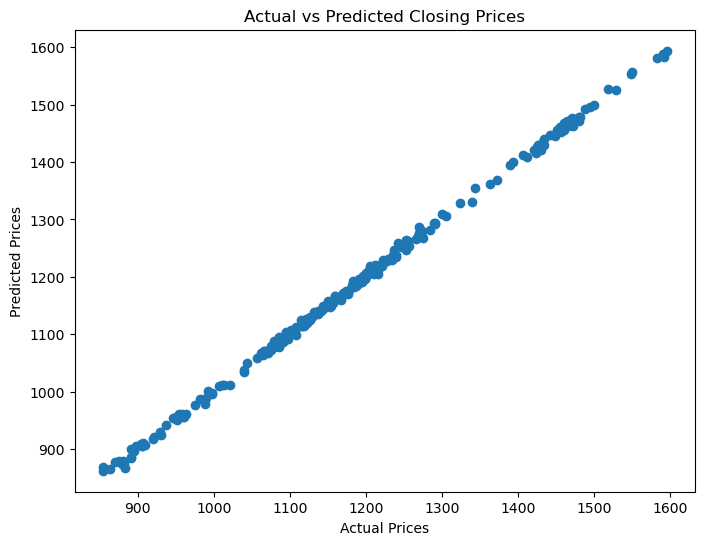

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [33]:
# Example: Predict using the latest available data
latest_data = df[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
latest_scaled = scaler.transform(latest_data)
predicted_price = model.predict(latest_scaled)[0]  # returns a numpy array or scalar
predicted_price_value = predicted_price.item()     # safely get scalar from array
print(f"Predicted closing price for {ticker} on the next trading day: {predicted_price_value:.2f} INR")

Predicted closing price for RELIANCE.NS on the next trading day: 1392.72 INR


In [34]:
joblib.dump(model, "reliance_model.pkl")
joblib.dump(scaler, "reliance_scaler.pkl")
print("Model and scaler saved.")

Model and scaler saved.


In [35]:
loaded_model = joblib.load("reliance_model.pkl")
loaded_scaler = joblib.load("reliance_scaler.pkl")

# Example with loaded model
sample_data = latest_data
sample_scaled = loaded_scaler.transform(sample_data)
sample_pred = loaded_model.predict(sample_scaled)[0].item()
print(f"Loaded model prediction: {sample_pred:.2f} INR")

Loaded model prediction: 1392.72 INR
